In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


m = 329.6000005370206 +- 10.750504033992799
b = -1614.2800028999116 +- 58.13229996629982


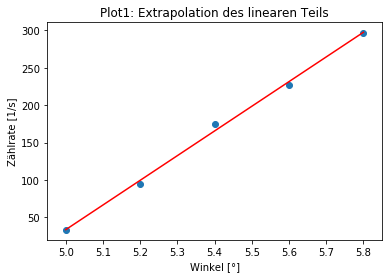

In [3]:
x = np.linspace(5,5.8,5)
y = np.array([33.4,95,175.4,227,297])

plt.scatter(x,y)
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate [1/s]')
plt.title('Plot1: Extrapolation des linearen Teils')
plt.savefig('P1_ExtrapolationdeslinearenTeils.pdf', format = 'pdf')

def linear(x, m, b):
    return m*x+b
popt, pcov = curve_fit(linear, x, y)

plt.plot(x, linear(x,*popt),'r')
print('m =', popt[0], '+-', np.sqrt(pcov[0,0]))
print('b =', popt[1],'+-', np.sqrt(pcov[1,1]))
m = popt[0]
Dm = np.sqrt(pcov[0,0])
b = popt[1]
Db = np.sqrt(pcov[1,1]) 

In [4]:
Ug = np.array([16.2,21.4,13.4,16.2,21.6,21.4,21.2,21.2,25.8,25])
ug = np.mean(Ug)
Dug = np.std(Ug)
theta_gr = (ug-b)/m
n = ug-b
Dn = np.sqrt(Dug**2+Db**2)
Dtheta_gr = np.sqrt((Dn/n)**2+(Dm/m)**2)*theta_gr
d = 201.4*10**-12
lambda_gr = 2*d*np.sin(2*np.pi*theta_gr/360)
Dlambda_gr = 2*d*np.cos(2*np.pi*theta_gr/360)*Dtheta_gr*2*np.pi/360

e = 1.6022*10**-19
c = 2.9979*10**8
U = 35*10**3
h = lambda_gr*e*U/c
Dh = Dlambda_gr*e*U/c



In [5]:
theta_gr_2 = np.arcsin(lambda_gr/d)
Dtheta_gr_2 = 1/np.sqrt(1-(lambda_gr/d)**2)*Dlambda_gr/d

a = 1351.3036746937962 +- 37.02378872070459
mu = 10.208164216751877 +- 0.0036879489975471568
sigma = 0.11808521952129247 +- 0.004188011757166139
b = 135.82683828304806 +- 41.37637738529543
c = -10.960587834969301 +- 4.041333477675485
7.138622153223883e-11 +- 8.170199367270918e-13
0.2780694419506195 +- 4.1302230726242737e-05


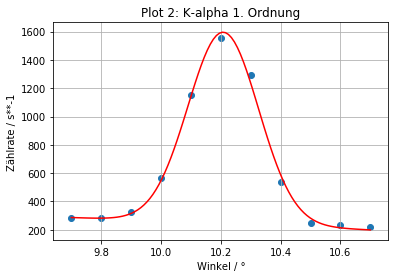

In [6]:
def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))
x, y = np.loadtxt('K_alpha1.txt',skiprows=0,converters={0:comma_to_float,1:comma_to_float},comments='>',unpack=True)

plt.scatter(x,y)

def gauss(x,a,mu,sigma,b,c):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))+b*x+c*x**2
k = np.linspace(x[0],x[len(x)-1],100)
popt, pcov = curve_fit(gauss,x,y,p0=[1,10.2,0.1,1,1])
print('a =', popt[0],'+-', np.sqrt(pcov[0][0]))
print('mu =', popt[1],'+-', np.sqrt(pcov[1][1]))
print('sigma =', popt[2],'+-', np.sqrt(pcov[2][2]))
print('b =', popt[3],'+-', np.sqrt(pcov[3][3]))
print('c =', popt[4],'+-', np.sqrt(pcov[4][4]))

plt.plot(k,gauss(k,*popt),'r', label='Gaussfit')
plt.title('Plot 2: K-alpha 1. Ordnung')
plt.xlabel('Winkel / °')
plt.ylabel('Zählrate / s**-1')
plt.grid()
plt.savefig('P2_K_alpha1.pdf', format='pdf')
mu = popt[1]
Dmu = popt[2]
l1 = 2*d*np.sin(2*np.pi*mu/360)
Dl1 = 2*d*np.cos(2*np.pi*mu/360)*Dmu*2*np.pi/360
print(l1,'+-',Dl1)

#Halbwertsbreite:

FWHD = 2*np.sqrt(2*np.log(2))*Dmu
DFWHD = 2*np.sqrt(2*np.log(2))*pcov[2][2]
print(FWHD, '+-',DFWHD )

a = 386.6486383290596 +- 9.895187510132171
mu = 9.050727163910212 +- 0.0034938568646973927
sigma = 0.12135578563472404 +- 0.0039014022205015593
b = 127.73200398993788 +- 6.044681905002504
c = -10.361113806236752 +- 0.6917214360434477
6.33640085838558e-11 +- 8.425315418620997e-13


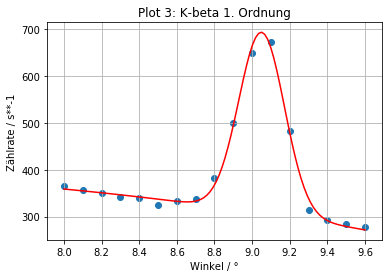

In [7]:
x, y = np.loadtxt('K_beta1.txt',skiprows=0,converters={0:comma_to_float,1:comma_to_float},comments='>',unpack=True)
plt.scatter(x,y)

k = np.linspace(x[0],x[len(x)-1],100)
popt, pcov = curve_fit(gauss,x,y,p0=[660,9.1,0.1,1,1])
print('a =', popt[0],'+-', np.sqrt(pcov[0][0]))
print('mu =', popt[1],'+-', np.sqrt(pcov[1][1]))
print('sigma =', popt[2],'+-', np.sqrt(pcov[2][2]))
print('b =', popt[3],'+-', np.sqrt(pcov[3][3]))
print('c =', popt[4],'+-', np.sqrt(pcov[4][4]))

plt.plot(k,gauss(k,*popt),'r', label='Gaussfit')
plt.title('Plot 3: K-beta 1. Ordnung')
plt.xlabel('Winkel / °')
plt.ylabel('Zählrate / s**-1')
plt.grid()
plt.savefig('P3_K_beta1.pdf', format='pdf')
mu = popt[1]
Dmu = popt[2]
l2 = 2*d*np.sin(2*np.pi*mu/360)
Dl2 = 2*d*np.cos(2*np.pi*mu/360)*Dmu*2*np.pi/360
print(l2,'+-',Dl2)

a = 203.7925594521547 +- 2.935901592446894
mu = 20.667021386359217 +- 0.002071942598291891
sigma = 0.12704883468030623 +- 0.002275938974861432
b = 14.07509546854723 +- 1.9574929446841864
c = -0.5543549732642971 +- 0.09388006483550847
7.108138236789443e-11 +- 4.1784932290288424e-13


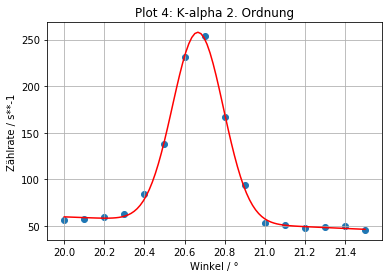

In [8]:
x, y = np.loadtxt('K_alpha2.txt',skiprows=0,converters={0:comma_to_float,1:comma_to_float},comments='>',unpack=True)
plt.scatter(x,y)
k = np.linspace(x[0],x[len(x)-1],100)
popt, pcov = curve_fit(gauss,x,y,p0=[250,20.7,0.1,1,1])
print('a =', popt[0],'+-', np.sqrt(pcov[0][0]))
print('mu =', popt[1],'+-', np.sqrt(pcov[1][1]))
print('sigma =', popt[2],'+-', np.sqrt(pcov[2][2]))
print('b =', popt[3],'+-', np.sqrt(pcov[3][3]))
print('c =', popt[4],'+-', np.sqrt(pcov[4][4]))

plt.plot(k,gauss(k,*popt),'r', label='Gaussfit')
plt.title('Plot 4: K-alpha 2. Ordnung')
plt.xlabel('Winkel / °')
plt.ylabel('Zählrate / s**-1')
plt.grid()
plt.savefig('P4_K_alpha2.pdf', format='pdf')

mu = popt[1]
Dmu = popt[2]
l3 = d*np.sin(2*np.pi*mu/360)
Dl3 = d*np.cos(2*np.pi*mu/360)*Dmu*2*np.pi/360
print(l3,'+-',Dl3)

a = 55.0990319564467 +- 4.4060940185186555
mu = 18.321053313115016 +- 0.010702468339852222
sigma = 0.11797357405881558 +- 0.01162061878139887
b = 12.177791006665055 +- 2.7841629915726003
c = -0.47143641473992925 +- 0.1525612074691996
6.33083379820686e-11 +- 3.9366757347620855e-13


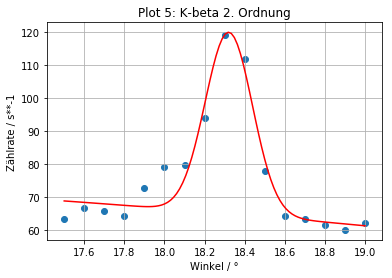

In [9]:
x, y = np.loadtxt('K_beta2.txt',skiprows=0,converters={0:comma_to_float,1:comma_to_float},comments='>',unpack=True)
plt.scatter(x,y)
k = np.linspace(x[0],x[len(x)-1],100)
popt, pcov = curve_fit(gauss,x,y,p0=[120,18.3,0.1,1,1])
print('a =', popt[0],'+-', np.sqrt(pcov[0][0]))
print('mu =', popt[1],'+-', np.sqrt(pcov[1][1]))
print('sigma =', popt[2],'+-', np.sqrt(pcov[2][2]))
print('b =', popt[3],'+-', np.sqrt(pcov[3][3]))
print('c =', popt[4],'+-', np.sqrt(pcov[4][4]))

plt.plot(k,gauss(k,*popt),'r', label='Gaussfit')
plt.title('Plot 5: K-beta 2. Ordnung')
plt.xlabel('Winkel / °')
plt.ylabel('Zählrate / s**-1')
plt.grid()
plt.savefig('P5_K_beta1.pdf', format='pdf')
mu = popt[1]
Dmu = popt[2]
l4 = d*np.sin(2*np.pi*mu/360)
Dl4 = d*np.cos(2*np.pi*mu/360)*Dmu*2*np.pi/360
print(l4,'+-',Dl4)

m = 31.468706303591258 +- 0.6277344245806918
b = -709.0060026226088 +- 18.64452258996013
22.604790160739118 +- 0.7460315612345061


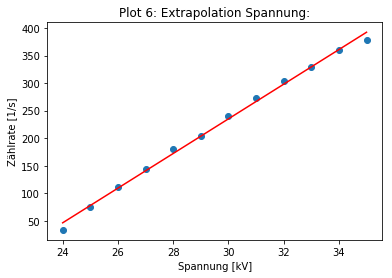

In [10]:
#c:

U = np.linspace(24,35,12)
x = np.array([33.35,74.9,111.4,143.8,180.1,204.2,239.8,272.9,303,329.9,361,377.5])

plt.scatter(U,x)
popt, pcov = curve_fit(linear, U, x)
plt.plot(U, linear(U,*popt),'r')
plt.ylabel('Zählrate [1/s]')
plt.xlabel('Spannung [kV]')
plt.title('Plot 6: Extrapolation Spannung:')
plt.savefig('P6_K_Extrapolation Spannung.pdf', format='pdf')
print('m =', popt[0], '+-', np.sqrt(pcov[0,0]))
print('b =', popt[1],'+-', np.sqrt(pcov[1,1]))
m = popt[0]
Dm = np.sqrt(pcov[0,0])
b = popt[1]
Db = np.sqrt(pcov[1,1]) 
c = np.array([0.8,1.45,2.4,4.7])
f = np.mean(c)
Df = np.std(c)
Ugr = (f-b)/m
n = f-b
Dn = np.sqrt(Df**2+Db**2)
DU_gr = np.sqrt((Dn/n)**2+(Dm/m)**2)*Ugr
print(Ugr,'+-',DU_gr)
